# Objective: Build a CNN Classification model to predict wether a given image is a horse or a human

## Data Collection 

In [1]:
import os
import zipfile
    
train_zip = r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human.zip'
valid_zip = r'C:\Users\Srikar\Desktop\Jupyter Notebooks\validation-horse-or-human.zip'
a = r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human'
b = r'C:\Users\Srikar\Desktop\Jupyter Notebooks\validation-horse-or-human'
zip_ref = zipfile.ZipFile(train_zip,'r')
zip_refv = zipfile.ZipFile(valid_zip,'r')
zip_ref.extractall(a)
zip_refv.extractall(b)
print(zip_ref.namelist())
print(zip_refv.namelist())

['horses/horse01-0.png', 'horses/horse01-1.png', 'horses/horse01-2.png', 'horses/horse01-3.png', 'horses/horse01-4.png', 'horses/horse01-5.png', 'horses/horse01-6.png', 'horses/horse01-7.png', 'horses/horse01-8.png', 'horses/horse01-9.png', 'horses/horse02-0.png', 'horses/horse02-1.png', 'horses/horse02-2.png', 'horses/horse02-3.png', 'horses/horse02-4.png', 'horses/horse02-5.png', 'horses/horse02-6.png', 'horses/horse02-7.png', 'horses/horse02-8.png', 'horses/horse02-9.png', 'horses/horse03-0.png', 'horses/horse03-1.png', 'horses/horse03-2.png', 'horses/horse03-3.png', 'horses/horse03-4.png', 'horses/horse03-5.png', 'horses/horse03-6.png', 'horses/horse03-7.png', 'horses/horse03-8.png', 'horses/horse03-9.png', 'horses/horse04-0.png', 'horses/horse04-1.png', 'horses/horse04-2.png', 'horses/horse04-3.png', 'horses/horse04-4.png', 'horses/horse04-5.png', 'horses/horse04-6.png', 'horses/horse04-7.png', 'horses/horse04-8.png', 'horses/horse04-9.png', 'horses/horse05-0.png', 'horses/horse05

Lets break the data into 4 groups. Training for horses and humans and validation for horses and humans

In [2]:
# Directory with our training horse pictures
train_horse_dir = os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human\horses')

# Directory with our training human pictures
train_human_dir = os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human\humans')

# Directory with our validation horse pictures
valid_horse_dir = os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\validation-horse-or-human\horses')

# Directory with our validation human pictures
valid_human_dir = os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\validation-horse-or-human\humans')

To verify the proper data, lets see 10 random data points in each folder

In [3]:
import random

train_horse_names = os.listdir(train_horse_dir)
print('Training Horses: \n',random.sample(train_horse_names,10),'\n')

train_human_names = os.listdir(train_human_dir)
print('Training Humans: \n',random.sample(train_human_names,10),'\n')

valid_horse_names = os.listdir(valid_horse_dir)
print('Validation Horses: \n',random.sample(valid_horse_names,10),'\n')

valid_human_names = os.listdir(valid_human_dir)
print('Validation Horses: \n',random.sample(valid_human_names,10),'\n')

Training Horses: 
 ['horse03-8.png', 'horse11-6.png', 'horse17-9.png', 'horse40-6.png', 'horse27-0.png', 'horse26-2.png', 'horse43-2.png', 'horse13-2.png', 'horse04-5.png', 'horse48-3.png'] 

Training Humans: 
 ['human06-24.png', 'human01-03.png', 'human07-26.png', 'human07-24.png', 'human09-08.png', 'human10-27.png', 'human03-11.png', 'human11-18.png', 'human05-24.png', 'human04-29.png'] 

Validation Horses: 
 ['horse1-170.png', 'horse4-541.png', 'horse3-026.png', 'horse1-264.png', 'horse3-498.png', 'horse4-000.png', 'horse2-011.png', 'horse4-468.png', 'horse6-198.png', 'horse4-232.png'] 

Validation Horses: 
 ['valhuman03-01.png', 'valhuman05-07.png', 'valhuman05-22.png', 'valhuman05-04.png', 'valhuman01-01.png', 'valhuman01-17.png', 'valhuman04-12.png', 'valhuman02-20.png', 'valhuman05-09.png', 'valhuman04-22.png'] 



In [4]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(valid_horse_dir)))
print('total validation human images:', len(os.listdir(valid_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


## Visualization

Lets visulaize x number of horses an y number of humans on a graph

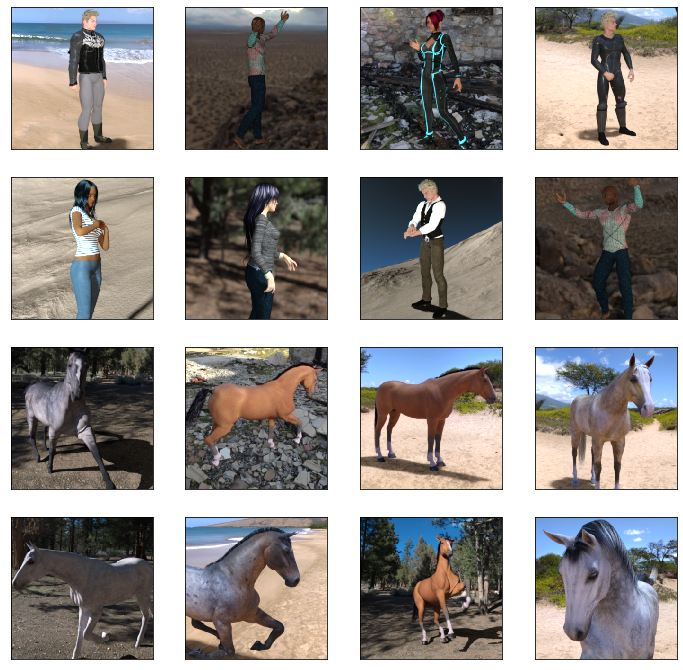

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

num_horses = len(os.listdir(train_horse_dir))
num_humans = len(os.listdir(train_human_dir))

plt.figure(figsize = (12,12))
nrows = 4
ncols = 4


def PlotImages(rows,cols):
    ##PLOTTING HUMANS
    for i in range((rows*cols)//2):
        plt.subplot(rows,cols,i+1)
        z = random.randint(1,num_humans)
        plt.imshow(plt.imread(os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human\humans',train_human_names[z])))
        plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[])
    ##PLOTTING HORSES
    for i in range(((rows*cols)//2),(rows*cols)):
        plt.subplot(rows,cols,i+1)
        t = random.randint(1,num_horses)
        plt.imshow(plt.imread(os.path.join(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human\horses',train_horse_names[t])))
        plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[])
        

PlotImages(nrows,ncols)

## Tesnorflow Model 

In [17]:
import tensorflow as tf
from tensorflow import keras

Becasue the data is quite large, we are going to run multiple concolutions to improve accuracy and gain insight on what aspects of an image determine the difference between a horse or human

In [7]:
model = tf.keras.Sequential([
    #First Convolution
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #Second Convolution
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourth Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten results into DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    #0nly 1 output nueron signifying 0 for horse or 1 for human
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\Srikar\Desktop\Jupyter Notebooks\horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
    r'C:\Users\Srikar\Desktop\Jupyter Notebooks\validation-horse-or-human',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Now we can train the model!We are going to run for 8 steps per epoch because 1027 (total # of training images) divided by 128 (batch size) is 8.02. We are going to round down to prevent overfitting. Similarly we will run validation for 8 steps as well because 256/32 = 8 exactly.

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose=1,
    validation_data = valid_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 48s 6s/step - loss: 0.0528 - accuracy: 0.9778 - val_loss: 1.5526 - val_accuracy: 0.8555
Epoch 2/15
8/8 [==============================] - 45s 6s/step - loss: 0.0151 - accuracy: 0.9978 - val_loss: 1.8207 - val_accuracy: 0.8672
Epoch 3/15
8/8 [==============================] - 45s 6s/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 1.7927 - val_accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 50s 6s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8263 - val_accuracy: 0.8945
Epoch 5/15
8/8 [==============================] - 62s 8s/step - loss: 6.5534e-04 - accuracy: 1.0000 - val_loss: 2.2500 - val_accuracy: 0.8906
Epoch 6/15
8/8 [==============================] - 43s 5s/step - loss: 0.6558 - accuracy: 0.7804 - val_loss: 1.3127 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 53s 7s/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 1.8838 - val_accuracy: 0.8516
Epoch 8/15
8/8 [==============

We can see that the accuracy on the training data is pretty good thus not suggesting some overfitting. However the validation accuracy is pretty good at 87%

## Visualize the Results

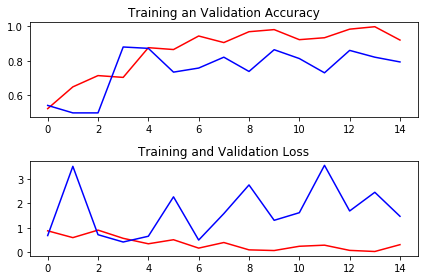

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.subplot(2,1,1)
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = "Validation Accuracy)")
plt.title('Training an Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(epochs,loss,'r',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.tight_layout()

## Prediction 

Lets choose an image from the current directory that out model can predict on. This methos only allows one file to be selected

In [12]:
from ipyfilechooser import FileChooser

fc=FileChooser(os.getcwd())
display(fc)

FileChooser(path='C:\Users\Srikar\Desktop\Jupyter Notebooks', filename='', show_hidden='False')

In [16]:
from keras.preprocessing import image

img = image.load_img(fc.selected, target_size = (300,300))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

result = model.predict(x)
if result > 0.5:
    print(fc.selected_filename + " is a Human")
else:
    print(fc.selected_filename + " is a Horse")

HORSE1.jpg is a Horse
